<a href="https://colab.research.google.com/github/SanjayS059/Portfolio/blob/main/Gen%20AI%20Projects/Dynamic%20Role%20Mapping/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch matplotlib numpy pandas

In [45]:
pip install pytorch_lightning


  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached torchmetrics-1.4.1-py3-none-any.whl.metadata (20 kB)
  Using cached lightning_utilities-0.11.7-py3-none-any.whl.metadata (5.2 kB)
Using cached pytorch_lightning-2.4.0-py3-none-any.whl (815 kB)
Using cached lightning_utilities-0.11.7-py3-none-any.whl (26 kB)
Using cached torchmetrics-1.4.1-py3-none-any.whl (866 kB)


In [6]:
pip install pyngrok

In [8]:
get_ipython().system_raw("mlflow ui --port 5000 &")

from pyngrok import ngrok

ngrok.kill()
NGROK_AUTH_TOKEN ="2lxTW9wr5Ij5wlBap9FMEkAp78v_3x6yAGTvQiqSuEpyYodFa"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLFlow UI:", ngrok_tunnel.public_url)


MLFlow UI: https://ae41-34-121-2-119.ngrok-free.app


In [15]:
import mlflow
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

In [26]:
emnist_train_data = pd.read_csv("/content/emnist-letters-train.csv", header = None)
emnist_test_data = pd.read_csv("/content/emnist-letters-test.csv", header = None)

#emnist_train_data.head()
#emnist_test_data.head()
emnist_test_data.sample(frac =1)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
7650,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12418,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13057,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14554,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3487,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11418,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2554,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

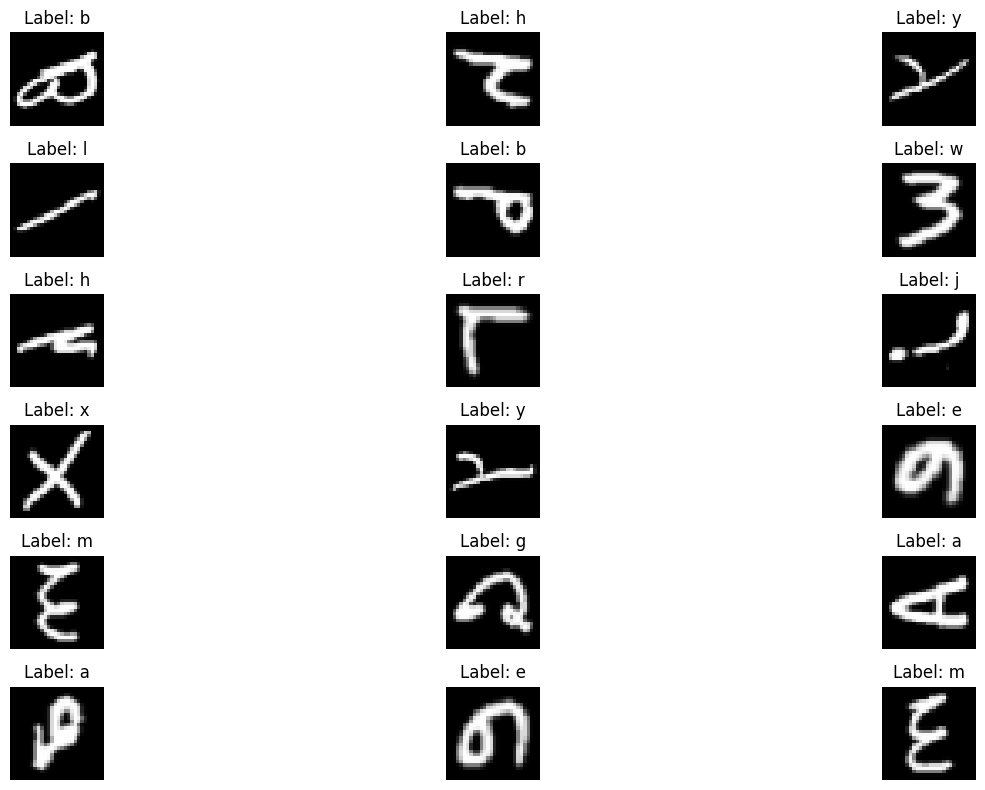

In [29]:
# Assuming the first column contains labels and the rest are pixel values
train_labels = emnist_train_data.values[:, 0]
train_images = emnist_train_data.values[:, 1:]

# Reshape the images to (num_samples, 28, 28)
train_images = train_images.reshape(-1, 28, 28)

# Display a few random images
num_samples = 18

random_indices = np.random.randint(0, len(train_images), num_samples)

random_indices

fig = plt.figure(figsize = (16, 8))

for i, idx in enumerate(random_indices):
    plt.subplot(6, int(num_samples / 6), i+1)
    plt.imshow(train_images[idx] / 255.0, cmap = "gray")
    plt.title(f"Label: {classes[int(train_labels[idx] - 1)]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
experiment_id = mlflow.create_experiment(name = 'test_experiment')

experiment_id

'372218937499552520'

In [31]:
experiment = mlflow.get_experiment(experiment_id)

print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

Name: test_experiment
Experiment_id: 372218937499552520
Artifact Location: file:///content/mlruns/372218937499552520
Tags: {}
Lifecycle_stage: active
Creation timestamp: 1726123152987


In [32]:
mlflow.set_experiment(experiment_name = 'test_experiment')

<Experiment: artifact_location='file:///content/mlruns/372218937499552520', creation_time=1726123152987, experiment_id='372218937499552520', last_update_time=1726123152987, lifecycle_stage='active', name='test_experiment', tags={}>

In [33]:
mlflow.start_run()

mlflow.end_run()

In [34]:
data_info = """
  The EMNIST dataset is a set of handwritten character digits derived
  from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset
  structure that directly matches the MNIST dataset.
  Further information on the dataset contents and conversion process can be found in
  the paper available at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt", "w") as f:
    f.write(data_info)

In [35]:
with mlflow.start_run(run_name = 'test_experiment_run') as current_run:

    mlflow.log_metric('Accuracy', 0.67)

    params = {
        'num_nn_layers': 4
    }
    mlflow.log_params(params)

    mlflow.log_figure(fig, 'sample_images.png')

    mlflow.log_artifact("data_info.txt")

    mlflow.set_tag('EMNIST', 'Classification using DNNs')

In [36]:
class EMNISTDataset(Dataset):
    def __init__(self, dataframe):

        self.images = torch.tensor(dataframe.iloc[:, 1:].values, dtype= torch.float32)

        self.labels = torch.tensor(dataframe.iloc[:, 0].values, dtype = torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        images = self.images[idx]

        images = images / 255.0
        labels = self.labels[idx]

        return images, labels

In [37]:
train_dataset = EMNISTDataset(emnist_train_data)

test_dataset = EMNISTDataset(emnist_test_data )

len(train_dataset), len(test_dataset)

(34169, 14800)

In [38]:
from torch.utils.data import random_split

val_percent = 0.1
val_len = int(val_percent * len(train_dataset))

train_ds, val_ds = random_split(train_dataset, [len(train_dataset) - val_len, val_len])

print(len(train_ds), len(val_ds))

30753 3416


In [39]:
batch_size = 64

train_dataloader = DataLoader(train_ds, batch_size, shuffle = True, drop_last = True, num_workers=1)

val_dataloader = DataLoader(val_ds, batch_size, num_workers=1)

test_dataloader = DataLoader(test_dataset, batch_size, num_workers=1)

len(train_dataloader ), len(val_dataloader ), len(test_dataloader )

(480, 54, 232)

In [40]:
dataiter = iter(train_dataloader)
batch_images, batch_labels = next(dataiter)

batch_images

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [41]:
batch_labels

tensor([15., 20., 11.,  4., 18., 10., 13.,  3., 15., 25., 11., 18., 23., 23.,
         5.,  6., 14.,  8., 22., 17., 11., 14., 15., 14., 18., 26.,  1., 14.,
         4., 26.,  8., 16., 11., 22., 21., 14., 25., 12., 23.,  5., 20.,  7.,
        18.,  1., 26.,  8.,  2., 20., 21.,  9., 19., 13.,  5., 19.,  6., 18.,
        22., 21., 15., 16., 18., 13.,  9., 25.])

In [42]:
batch_images.shape, len(batch_labels)

(torch.Size([64, 784]), 64)

In [43]:
import mlflow

experiment_id = mlflow.create_experiment(name = "emnist_letters_prediction_using_dnn")

mlflow.set_experiment(experiment_name = "emnist_letters_prediction_using_dnn")

<Experiment: artifact_location='file:///content/mlruns/215348780898906340', creation_time=1726123674501, experiment_id='215348780898906340', last_update_time=1726123674501, lifecycle_stage='active', name='emnist_letters_prediction_using_dnn', tags={}>

In [46]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy

In [47]:
input_size = 28 * 28

output_size = 26

In [48]:
class EmnistModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss()

        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 128)
        self.linear3 = nn.Linear(128, 32)
        self.linear4 = nn.Linear(32, output_size)

    def forward(self, xb):
        out = self.linear1(xb)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.relu(out)

        out = self.linear4(out)
        return out

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr = 0.0001)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("train_loss", loss, on_epoch = True, prog_bar = True)
        self.log("train_acc", acc, on_epoch = True, prog_bar = True)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("valid_loss", loss, on_epoch = True, prog_bar = True)
        self.log("valid_acc", acc, on_epoch = True, prog_bar = True)

        return acc

    def test_step(self, batch, batch_idx):
        x, y = batch
        y -= 1

        y_hat = self(x)
        loss = self.criterion(y_hat, y.long())
        pred = y_hat.argmax(dim = 1)

        acc = accuracy(pred, y, task = "multiclass", num_classes = 26)

        self.log("test_loss", loss, logger = True)
        self.log("test_acc", acc, logger = True)

        return acc


    def predict_step(self, batch, batch_idx, dataloader_idx = 0):
        x, y = batch

        return self(x)